Image featuring : First Order statistical Features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
import cv2 as cv
import os
import glob

In [4]:
im=io.imread('C:/Users/Bilal/Desktop/Khadija/MID/original.png')
im=cv.cvtColor(im,cv.COLOR_BAYER_BG2GRAY)

<ipython-input-4-0cb6fbcdf36a>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=io.imread('/content/original.png')


array([[164, 164, 166, ..., 169, 168, 168],
       [164, 164, 166, ..., 169, 168, 168],
       [164, 164, 165, ..., 167, 166, 166],
       ...,
       [172, 172, 171, ..., 178, 179, 179],
       [172, 172, 171, ..., 178, 178, 178],
       [172, 172, 171, ..., 178, 178, 178]], dtype=uint8)
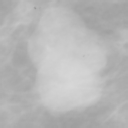

In [5]:
im

In [91]:

#region extraction
def regionExtraction(image,kernal_size):
  #size of kernal && image
  kernal_r,kernal_c=kernal_size,kernal_size
  image_r,image_c=image.shape

  #check how much padding require for img
  padding_r=kernal_r//2 # return the quotient
  padding_c=kernal_c//2

  #apply this padding on given img
  padded_img=np.pad(image,((padding_r,padding_r),(padding_c,padding_c)),mode='constant',constant_values=0)
  all_resultant_region=np.zeros((image_r,image_c,kernal_r,kernal_c))

  #select region of img accordind to mask/kernal
  for i in range(image_r):
    for j in range(image_c):

       #now put all possible region in all_resultant_region
       all_resultant_region[i,j]=padded_img[i:i+kernal_r,j:j+kernal_c]

  return all_resultant_region

In [94]:
#1. mean "µ"
def mean(im,kernal_size):
  resultant_mean=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      # take mean of the region
      resultant_mean[i,j]=np.sum(region[i,j])/(kernal_size*kernal_size)

  return resultant_mean


In [143]:
# check a mean_result
mean_resultant=mean(im,5)
#convert into numpy array
mean_resultant

array([[ 59.24,  79.32,  99.56, ..., 101.28,  80.84,  60.36],
       [ 78.84, 105.6 , 132.6 , ..., 134.16, 107.08,  80.04],
       [ 98.56, 132.04, 165.76, ..., 166.68, 133.08,  99.56],
       ...,
       [103.4 , 137.92, 172.64, ..., 177.28, 142.2 , 106.84],
       [ 82.56, 110.12, 137.88, ..., 141.72, 113.72,  85.48],
       [ 61.8 ,  82.44, 103.28, ..., 106.36,  85.36,  64.16]])

In [113]:
#median "med"
def median(im,kernal_size):
  resultant_median=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  #first sort region values in ascending order

  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      #first flatten the array than sort the region
      flatten_region=region[i,j].flatten() # convert into a 1-D
      #now sort this in ascending order
      sort_region=np.sort(flatten_region)
      #now take a middle element
      size=sort_region.shape[0]
      if(size%2==0):
        resultant_median[i,j]=sort_region[size//2]
      else:
        resultant_median[i,j]=(sort_region[(size//2)-1]+sort_region[size//2])/2
  return resultant_median

In [142]:
resultant_median=median(im,5)
resultant_median

array([[  0. ,   0. , 164. , ..., 166.5,   0. ,   0. ],
       [  0. , 164. , 164. , ..., 166.5, 164. ,   0. ],
       [163.5, 164. , 165. , ..., 166.5, 164. , 163. ],
       ...,
       [171. , 172. , 172.5, ..., 178. , 178. , 178. ],
       [  0. , 171.5, 172. , ..., 177. , 177. ,   0. ],
       [  0. ,   0. , 171. , ..., 175. ,   0. ,   0. ]])

In [123]:
#variance "ϭ^2"
def variance(im,kernal_size):
  resultant_variance=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_variance[i,j]=np.sum(((region[i,j]-mean_resultant[i,j])**2))/((kernal_size*kernal_size)-1)

  return resultant_variance

In [141]:
resultant_variance=variance(im,5)
resultant_variance

array([[6.49910667e+03, 7.10106000e+03, 6.88575667e+03, ...,
        7.12554333e+03, 7.37639000e+03, 6.74732333e+03],
       [7.01472333e+03, 6.53566667e+03, 4.58241667e+03, ...,
        4.69255667e+03, 6.72257667e+03, 7.23112333e+03],
       [6.74634000e+03, 4.54237333e+03, 4.27333333e+00, ...,
        9.72666667e+00, 4.61932667e+03, 6.88684000e+03],
       ...,
       [7.42525000e+03, 4.95432667e+03, 9.90000000e-01, ...,
        1.54333333e+00, 5.26633333e+03, 7.92705667e+03],
       [7.69209000e+03, 7.10561000e+03, 4.95136000e+03, ...,
        5.23179333e+03, 7.57796000e+03, 8.24567667e+03],
       [7.07275000e+03, 7.66959000e+03, 7.40796000e+03, ...,
        7.85699000e+03, 8.22274000e+03, 7.62322333e+03]])

In [125]:
#satandard deviation
def std(im,kernal_size):
  resultant_std=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_std[i,j]=np.sqrt(resultant_variance[i,j])
  return resultant_std



In [140]:
resultant_std=std(im,5)
resultant_std

array([[80.61703707, 84.26778744, 82.98045955, ..., 84.41293345,
        85.8859127 , 82.14209234],
       [83.75394518, 80.84347015, 67.69354967, ..., 68.50223841,
        81.99132068, 85.03601198],
       [82.13610655, 67.39713149,  2.06720423, ...,  3.11876044,
        67.96562857, 82.98698693],
       ...,
       [86.16989033, 70.38697796,  0.99498744, ...,  1.24230968,
        72.56950691, 89.03401972],
       [87.70456088, 84.29478038, 70.36590083, ..., 72.33113668,
        87.05147902, 90.80570834],
       [84.09964328, 87.5761954 , 86.0695068 , ..., 88.63966381,
        90.6793251 , 87.31107223]])

In [148]:
#skewness (sk)
def skewness(im,kernal_size):
  resultant_skewness=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_skewness[i,j]=(np.sum((region[i,j]-mean_resultant[i,j])**3))/(((kernal_size*kernal_size)-1)*((resultant_variance[i,j])**3))

  resultant_skewness=cv.normalize(resultant_skewness,None,norm_type=cv.NORM_MINMAX)
  return resultant_skewness

In [149]:
resultant_skewness=skewness(im,5)
resultant_skewness

array([[0.52941179, 0.52941177, 0.52941175, ..., 0.52941175, 0.52941177,
        0.52941179],
       [0.52941177, 0.52941174, 0.52941165, ..., 0.52941165, 0.52941174,
        0.52941177],
       [0.52941175, 0.52941165, 0.53030413, ..., 0.52949935, 0.52941165,
        0.52941175],
       ...,
       [0.52941175, 0.52941166, 0.52922989, ..., 0.51922655, 0.52941167,
        0.52941175],
       [0.52941177, 0.52941174, 0.52941166, ..., 0.52941167, 0.52941174,
        0.52941177],
       [0.52941179, 0.52941177, 0.52941175, ..., 0.52941175, 0.52941177,
        0.52941179]])

In [152]:
#kurtosis (kur)
def kurtosis(im,kernal_size):
  resultant_kurtosis=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_kurtosis[i,j]=(np.sum((region[i,j]-mean_resultant[i,j])**4))/(((kernal_size*kernal_size)-1)*((resultant_variance[i,j])**4))
  resultant_kurtosis=cv.normalize(resultant_kurtosis,None,norm_type=cv.NORM_MINMAX)
  return resultant_kurtosis

In [153]:
resultant_kurtosis=kurtosis(im,5)
resultant_kurtosis

array([[3.15284220e-11, 9.66197117e-12, 1.82952372e-11, ...,
        1.52663019e-11, 6.95497708e-12, 2.72755598e-11],
       [1.05651907e-11, 3.08645727e-11, 2.59827844e-10, ...,
        2.46348404e-10, 2.76773023e-11, 8.35054801e-12],
       [2.01873002e-11, 2.65055801e-10, 1.60102429e-04, ...,
        3.71030920e-05, 2.54911511e-10, 1.82903628e-11],
       ...,
       [1.18739677e-11, 2.18555857e-10, 3.68242439e-03, ...,
        1.91198421e-03, 1.90285360e-10, 7.04942874e-12],
       [4.15994955e-12, 2.18783744e-11, 2.18857856e-10, ...,
        1.93107771e-10, 1.59204990e-11, 5.53265603e-14],
       [2.23402772e-11, 4.34282871e-12, 1.20573119e-11, ...,
        7.67381085e-12, 2.11957246e-13, 1.54077674e-11]])

In [158]:
#mean absolute deviation (mad)
def mean_absolute_deviation(im,kernal_size):
  resultant_mean_absolute_deviation=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_mean_absolute_deviation[i,j]=np.sum((region[i,j]-mean_resultant[i,j]))/((kernal_size*kernal_size))
  resultant_mean_absolute_deviation=cv.normalize(resultant_mean_absolute_deviation,None,norm_type=cv.NORM_MINMAX)
  return resultant_mean_absolute_deviation

In [159]:
resultant_mean_absolute_deviation=mean_absolute_deviation(im,5)
resultant_mean_absolute_deviation

array([[0.33333333, 0.75      , 0.41666667, ..., 0.45833333, 0.375     ,
        0.5625    ],
       [0.375     , 0.70833333, 0.70833333, ..., 0.625     , 0.39583333,
        0.27083333],
       [0.41666667, 0.79166667, 0.83333333, ..., 0.25      , 0.04166667,
        0.41666667],
       ...,
       [0.29166667, 0.95833333, 1.        , ..., 0.45833333, 0.91666667,
        0.375     ],
       [0.41666667, 0.33333333, 0.66666667, ..., 0.54166667, 0.54166667,
        0.35416667],
       [0.64583333, 0.58333333, 0.45833333, ..., 0.54166667, 0.52083333,
        0.625     ]])

In [169]:
#median absolute deviation (mead)
def median_absolute_deviation(im,kernal_size):
  resultant_median_absolute_deviation=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      y=region[i,j]-resultant_mean_absolute_deviation[i,j]

      #normalize it first
      y=np.abs(y)

      #flatten the y and sort it in ascending order
      flatten_y=y.flatten()
      sort_y=np.sort(flatten_y)
      size=sort_y.shape[0]
      if(size%2==0):
        resultant_median_absolute_deviation[i,j]=sort_y[size//2]
      else:
        resultant_median_absolute_deviation[i,j]=(sort_y[(size//2)-1]+sort_y[size//2])/2
  return resultant_median_absolute_deviation

In [170]:
resultant_median_absolute_deviation=median_absolute_deviation(im,5)
resultant_median_absolute_deviation

array([[  0.33333333,   0.75      , 163.58333333, ..., 166.04166667,
          0.375     ,   0.5625    ],
       [  0.375     , 163.29166667, 163.29166667, ..., 165.875     ,
        163.60416667,   0.27083333],
       [163.08333333, 163.20833333, 164.16666667, ..., 166.25      ,
        163.95833333, 162.58333333],
       ...,
       [170.70833333, 171.04166667, 171.5       , ..., 177.54166667,
        177.08333333, 177.625     ],
       [  0.41666667, 171.16666667, 171.33333333, ..., 176.45833333,
        176.45833333,   0.35416667],
       [  0.64583333,   0.58333333, 170.54166667, ..., 174.45833333,
          0.52083333,   0.625     ]])

In [172]:
#local contrast
def local_contrast(im,kernal_size):
  resultant_local_contrast=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      resultant_local_contrast[i,j]=np.max(region)-np.min(region)
  return resultant_local_contrast

In [173]:
resultant_local_contrast=local_contrast(im,5)
resultant_local_contrast

array([[216., 216., 216., ..., 216., 216., 216.],
       [216., 216., 216., ..., 216., 216., 216.],
       [216., 216., 216., ..., 216., 216., 216.],
       ...,
       [216., 216., 216., ..., 216., 216., 216.],
       [216., 216., 216., ..., 216., 216., 216.],
       [216., 216., 216., ..., 216., 216., 216.]])

In [190]:
#local probability
def local_probability(im,kernal_size):
  resultant_local_probability_patch=np.zeros((im.shape[0],im.shape[1],kernal_size,kernal_size))
  resultant_local_probability_patch_mean=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      #1. find unique intensity with thier frequency in region
      uniqueIntensity,counts=np.unique(region[i,j],return_counts=True)

      #combine the intensity and count in form of dic
      intensity_frequeny=dict(zip(uniqueIntensity,counts))   # it store in key value pair key=intensity, value=count/frequency

      current_patch=region[i,j] # current patch
      frequency_count=np.zeros((kernal_size,kernal_size))
      total_population=kernal_size*kernal_size
      probability_region=np.zeros((kernal_size,kernal_size))

      #make a freueny_count so we can calculate a probability against each freuency
      for k in range(kernal_size):
        for l in range(kernal_size):
          frequency_count[k,l]=intensity_frequeny[current_patch[k,l]] # according to a intensity in a region it take a intensty count from a dict
          probability_region[k,l]=frequency_count[k,l]/total_population

      resultant_local_probability_patch_mean[i,j]=np.mean(probability_region) # contain probabitity mean of each region , output 1 value
      resultant_local_probability_patch[i,j]=probability_region # output will be a while 2D array 5*5



  return resultant_local_probability_patch,resultant_local_probability_patch_mean




In [191]:
resultant_probability_patch,resultant_probability_patch_mean=local_probability(im,5)
resultant_probability_patch_mean


array([[0.4752, 0.3504, 0.2544, ..., 0.2352, 0.3312, 0.4496],
       [0.3632, 0.2384, 0.1712, ..., 0.1488, 0.216 , 0.3248],
       [0.3088, 0.2128, 0.2128, ..., 0.1296, 0.1392, 0.2224],
       ...,
       [0.264 , 0.2384, 0.28  , ..., 0.3344, 0.3376, 0.3984],
       [0.3568, 0.2992, 0.248 , ..., 0.2224, 0.2864, 0.408 ],
       [0.4816, 0.4144, 0.312 , ..., 0.2672, 0.3632, 0.4944]])

In [192]:
resultant_probability_patch.shape

(128, 128, 5, 5)

In [234]:
#resultant_probability_patch

In [178]:
#percentile 25
def percentile_25(im,kernal_size):
  resultant_percentile_25=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      x=region[i,j].flatten()
      x.sort()
      index=int(np.floor((kernal_size*kernal_size)*0.25))
      resultant_percentile_25[i,j]=x[index]
  return resultant_percentile_25


In [179]:
resultant_percentile_25=percentile_25(im,5)
resultant_percentile_25

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 163., ..., 164.,   0.,   0.],
       [  0., 163., 164., ..., 164., 162.,   0.],
       ...,
       [  0., 171., 172., ..., 177., 176.,   0.],
       [  0.,   0., 171., ..., 175.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [180]:
#percentile 75
def percentile_75(im,kernal_size):
  resultant_percentile_75=np.zeros(im.shape)
  region=regionExtraction(im,kernal_size)
  for i in range(region.shape[0]):
    for j in range(region.shape[1]):
      x=region[i,j].flatten()
      x.sort()
      index=int(np.floor((kernal_size*kernal_size)*0.75))
      resultant_percentile_75[i,j]=x[index]
  return resultant_percentile_75

In [181]:
resultant_percentile_75=percentile_75(im,5)
resultant_percentile_75

array([[164., 164., 166., ..., 169., 168., 167.],
       [164., 165., 167., ..., 169., 168., 167.],
       [164., 166., 168., ..., 169., 168., 167.],
       ...,
       [172., 173., 173., ..., 178., 178., 178.],
       [172., 172., 173., ..., 178., 178., 178.],
       [171., 172., 172., ..., 178., 178., 178.]])

In [205]:
#code to check a all these 12 function output for any pixel intensity
def check_all_function_output_for_any_pixel_intensity(im,rowIndex,colsIndex,kernal_size):
  # call all function
  resultant_specfic_index=[]
  #1.  get a region for a intensity given according to a kernal_size
  if(rowIndex>=0 and rowIndex<im.shape[0] and colsIndex>=0 and colsIndex<im.shape[1]):
    resultant_specfic_index.append(mean_resultant[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_median[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_variance[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_std[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_skewness[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_kurtosis[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_mean_absolute_deviation[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_median_absolute_deviation[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_local_contrast[rowIndex,colsIndex])
    #resultant_specfic_index.append(resultant_probability_patch_mean[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_probability_patch[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_percentile_25[rowIndex,colsIndex])
    resultant_specfic_index.append(resultant_percentile_75[rowIndex,colsIndex])
    return resultant_specfic_index

  else:
    print("select a index with in range of im shape")
    return 0



In [207]:
resultant_specific_index=check_all_function_output_for_any_pixel_intensity(im,0,0,5)
resultant_specific_index

[59.24,
 0.0,
 6499.106666666667,
 80.61703707447121,
 0.5294117914485648,
 3.152842200504765e-11,
 0.3333333333333333,
 0.3333333333333333,
 216.0,
 array([[0.64, 0.64, 0.64, 0.64, 0.64],
        [0.64, 0.64, 0.64, 0.64, 0.64],
        [0.64, 0.64, 0.24, 0.24, 0.08],
        [0.64, 0.64, 0.24, 0.24, 0.08],
        [0.64, 0.64, 0.24, 0.24, 0.04]]),
 0.0,
 164.0]

In [231]:
def display_regions(all_resultant_region,title):

    # Create a figure to hold the subplots
    fig, axs = plt.subplots(2,6, figsize=(10,10))

    # Loop through each region and display it
    k=0
    for i in range(2):

        for j in range(6):

            if(k>=0 and k<12):
              axs[i, j].imshow(all_resultant_region[k],cmap='gray')
              axs[i, j].axis('off')
              axs[i, j].set_title(title[k])
              k+=1
            else:
              k=k


    plt.tight_layout()
    plt.show()

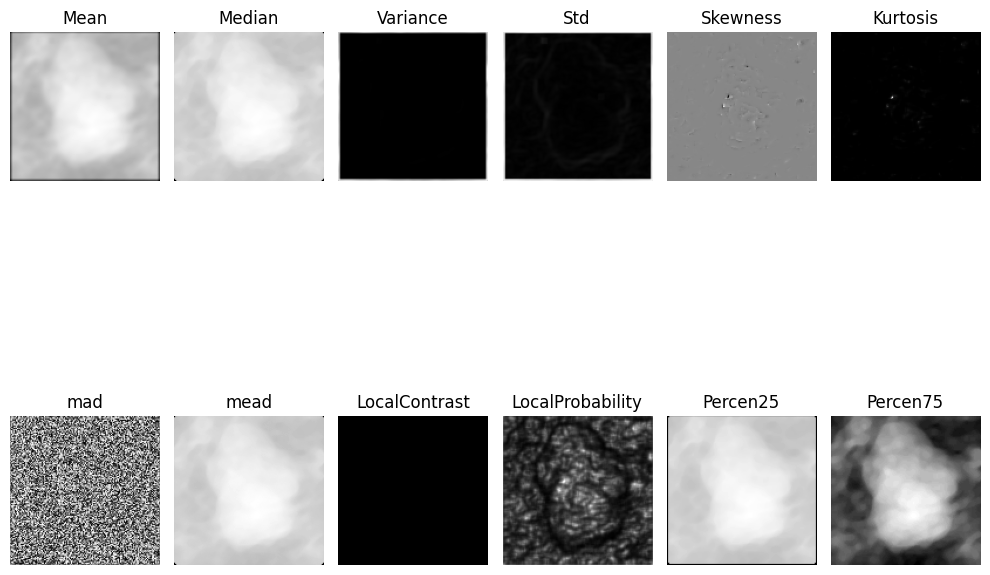

In [233]:
result=np.array([mean_resultant,resultant_median,resultant_variance,resultant_std,resultant_skewness,resultant_kurtosis,
                 resultant_mean_absolute_deviation,resultant_median_absolute_deviation,resultant_local_contrast,resultant_probability_patch_mean,resultant_percentile_25,resultant_percentile_75])

titles = ['Mean', 'Median', 'Variance', 'Std', 'Skewness', 'Kurtosis',
         'mad','mead', 'LocalContrast', 'LocalProbability', 'Percen25', 'Percen75']
display_regions(result,titles)
